<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/03-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal

En esta notebook exploraremos la regresión lineal (RL) aplicándo este algoritmo a varios conjuntos de datos. Además, usaremos la regresión lineal multiple y polinomial.

La **RL** es el modelo más simple para entender los problemas de regresión:

$$y=f(\mathbf{x},\mathbf{\theta})\\
\mathbf{x}\in\mathbb{R}^N,\ \mathbf{\theta}\in\mathbb{R}^P ,\ y\in\mathbb{R}$$

Este tipo de modelos son muy populares debido a que:

  - Son *baratos* y *rápidos* de estimar, i.e. es fácil de calcular $\mathbf{\hat{\theta}^*}$.
  - Son **INTERPRETABLES**.

El caso base de una RL consiste en ajustar una linea a un conjunto de puntos (1 variable independiente, 1 variable dependiente). Este modelo se puede extender a comportamientos más complicados (más dimensiones o relaciones no lineales).

## Ejemplo 1: Regresión Lineal Simple

Una Regresión Lineal Simple, es una linea en 2D que es **ajustada** a datos y tiene la siguiente forma:

\begin{equation}
y=\beta_0+\beta_1x_1,
\end{equation}

tal que $y$ y $\mathbf{x}$ son las variable dependiente e independiente, respectivamente. 

$\beta_0$ es la *ordenada al origen* (*intercepto*) y $\beta_1$ es la *pendiente* de la linea. 

Generaremos datos sintéticos que provienen de una linea con $\beta_0=2$ y $\beta_1=5$. Este ejemplo será útil para desarrollar la intuición detrás del método. 

In [ ]:
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = 5

x = 3 * rng.rand(size)
y = (b0 + (b1 * x)) + rng.randn(size) # Distribución Normal

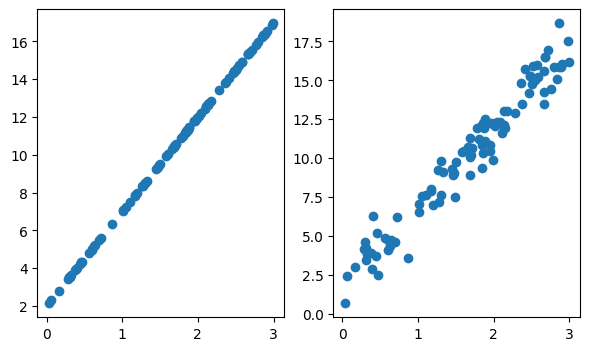

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.scatter(x,b0 + (b1 * x))
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.show()

<iframe scrolling="no" title="Regresión Lineal" src="https://www.geogebra.org/material/iframe/id/sv32x27d/width/700/height/500/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/true/ctl/false" width="700px" height="500px" style="border:0px;"> </iframe>

### Solución usando OLS

Para ejemplificar, volvamos a una variable independiente. El **ajuste óptimo** se puede determinar de varias formas, pero la manera más común (y la utilizada por `Scikit-Learn`) es mediante el **método de OLS**, el cual minimiza una cantidad denominada *suma de cuadrados de los residuos* (RSS):

\begin{align}
RSS(\hat{\beta_0},\hat{\beta_1}) &= \sum_{i=1}^n [y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)]^2,\\
\end{align}

en esta ecuación el **residuo** corresponde al valor $e_i$, tal que $e_i=y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)$. Geométricamente, un residuo es la distancia vertical entre la **linea ajustada** y el valor real $y_i$.

<img src="https://docs.google.com/uc?export=download&id=13gFpVnLx56mrQ1j4pGuZFlfXVl-EkoJK" width="600" align="middle">



In [ ]:
#@title
##@title Applet de geogebra

import IPython

iframe = '<iframe scrolling="no" title="Regresión Lineal" src="https://www.geogebra.org/material/iframe/id/sv32x27d/width/700/height/500/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/true/ctl/false" width="700px" height="500px" style="border:0px;"> </iframe>'

IPython.display.HTML(iframe)

/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Otra precisión importante, es que OLS produce estimados de los parámetros, es decir que se obtienen $\hat{\beta_0}$ y $\hat{\beta_1}$, y no los verdaderos $\beta_0$ y $\beta_1$.

**Representación Algebraica**

Un modelo de regresión lineal para una sola variable independiente, lo podemos escribir como un sistema de ecuaciones lineales utilizando matrices de la siguiente forma:

$$
\begin{bmatrix}
y_1 \\ y_2 \\ \dots \\ y_n 
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \dots \\
1 & x_{n} 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\end{bmatrix}
+
\begin{bmatrix}
e_0 \\
e_1 \\
\dots \\
e_n 
\end{bmatrix}
=
X\hat{\beta}+\mathbf{e}
$$

**Geométricamente**

Como ya lo dijimos, buscamos minimizar la distancia entre la $\mathbf{y}$ y nuestra estimación $X\hat{\beta}$. Sin embargo, $\mathbf{y}=X\hat{\beta}$ solo es posible en raras ocasiones y lo que usualmente podemos lograr es $\mathbf{y}\approx X\hat{\beta}$. Esto significa que $X\hat{\beta}$ yace en el **espacio de características** mientras que $\mathbf{y}$ no, por lo tanto, existe una diferencia (vector de residuos $\mathbf{e}$). La siguiente figura ejemplifica esta relación para 2 variables independientes:

<img src="https://docs.google.com/uc?export=download&id=1y3sInYKdSv5uFEvk-f01S-omV-T9JBTV" width="600" align="middle">

**Estimación de las $\hat{\beta}$s**

En este sentido, para estimar las $\hat{\beta}$s sus valores deben ser tales que el vector $\mathbf{e}=\mathbf{y}-X\hat{\beta}$ sea **perpendicular** (ortogonal en N dimensiones) al espacio de caracteristicas de $X$. 

Dado que dos vectores $u$ y $v$, son ortogonales si $\mathbf{u}^T\mathbf{v}=u_1v_1+u_2v_2+\ldots+u_nv_n=0$. Entonces, $\mathbf{e}$ es ortogonal a $X$ si $\mathbf{e}$ es ortogonal a cada vector columna de $X$. Esto es

\begin{align}
(\mathbf{y}-X\hat{\beta})^T X=0,\\
\mathbf{e}^T X=0
\end{align}

De lo anterior se sigue: 

\begin{align}
X^T (\mathbf{y}-X\hat{\beta}) &=0 \Leftrightarrow \\
X^T\mathbf{y} - X^TX\hat{\beta} &= 0 \Leftrightarrow \\
X^T\mathbf{y} &= X^TX\hat{\beta}  \Leftrightarrow \\
(X^T X)^{-1} X^T\mathbf{y} &= \hat{\beta} \\
\end{align}

### Implementación manual

⭕ Primero, añadimos el vector columna de 1s. Obtener la matriz

\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \dots \\
1 & x_{n} 
\end{bmatrix}

In [ ]:
# CÓDIGO:
"""
b0 = 2
b1 = 5

x = 3 * rng.rand(size)
y = (b0 + (b1 * x)) + rng.randn(size) # Distribución Normal




"""
 
ones=np.ones(size)
valores=x.reshape(-1)
X=np.vstack([ones,x]).T
X.shape


(100, 2)

In [ ]:
assert X.shape == (size,2)

⭕ Resolver usando mínimos cuadrados (OLS). Es decir,

$$\hat{\beta} = (X^T X)^{-1} X^T\mathbf{y}$$

In [ ]:
# CÓDIGO:
"""
np.linalg.inv(X.T @ X) @ X.T @ y

np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
"""
betas = np.matmul (  np.matmul(  np.linalg.inv(np.matmul(X.T,X)), X.T   ) , y)
beta_0=betas[0]
beta_1=betas[1]


In [ ]:
print(beta_0,beta_1)


1.784777443328057 5.101186122219514


Visualicemos la línea ajustada

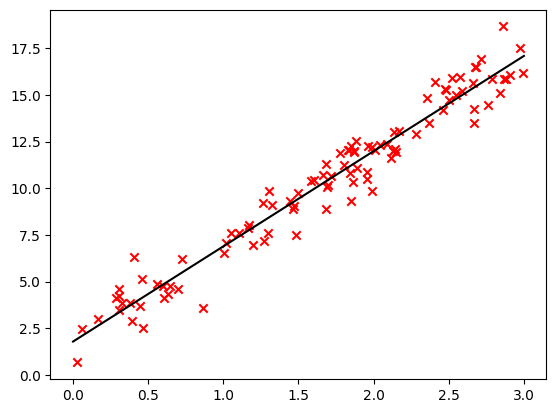

In [ ]:
x_values = np.linspace(0, 3, 100)

y_hat = beta_0 + beta_1 * x_values
plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_hat, color='black')
plt.show()

### Implementación con `scikit-learn`

In [ ]:
x = x.reshape(-1,1)
x.shape

(100, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

LinearRegression()

Por convención, en Scikit-Learn todos los parámetros del modelo que se aprendieron durante el proceso `fit()` son nombrados con guiones bajos al final. En este modelo podemos recuperar los valores de $\beta_0$ (el intercepto) y $\beta_1$ (el coeficiente).

In [ ]:
lr.intercept_

1.7847774433280499

In [ ]:
lr.coef_

array([5.10118612])

Realizamos predicciones

In [ ]:
beta_0 = lr.intercept_
beta_1 = lr.coef_

y_hat = beta_0 + beta_1 * x_values

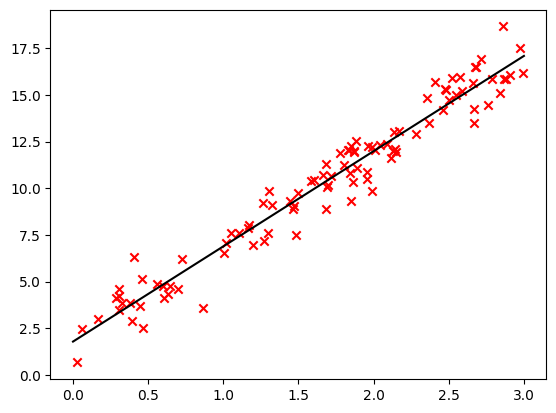

In [ ]:
x_values = np.linspace(0, 3, 100)

plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_hat, color='black')
plt.show()

### Condiciones

La regresión lineal tiene varias suposiciones: 

* **Linealidad**: la relación entre $X$ y $y$ es lineal.
* **Variables Independientes Estandarizadas** 
    $$x'=\frac{(x - \bar{x})}{\sigma}$$
* **Independencia**: las observaciones son independientes entre sí.
* **Normalidad**: los residuos, $e_i$ se distribuye normalmente.
$$e_i \sim \mathcal{N}(\mu,\,\sigma^{2})$$





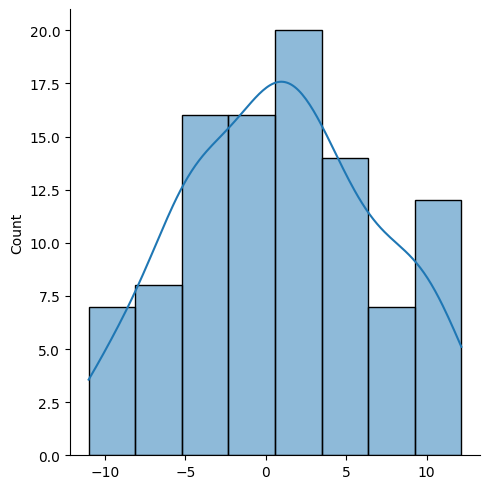

In [ ]:
import seaborn as sns

residuals = y-y_hat

sns.displot(residuals, kde=True)
plt.show()

**¿Qué pasa si no se satisface la hipótesis de la normalidad de los residuos?**

*Misspecifying the Shape of a Random Effects Distribution: Why Getting It Wrong May Not Matter*, Statistical Science, 2011, Vol. 26, No. 3, 388–402

**¿Qué pasa si el ruido que contamina la serie de tiempo NO es normal?**

Considere que los siguientes datos sintéticos provienen de una linea con $\beta_0=2$ y $\beta_1=5$. Los cuatro conjuntos de datos son contaminados por diferentes fuentes de ruido:

- Distribución Beta $P(x:\alpha,\beta) = \frac{\Gamma(\alpha +\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 -x)^{\beta - 1}$

- Distribución uniforme $P(x:a,b)=\frac{1}{b-a}\mid a\geq x\geq b$

- Distribución Logarítmica $P(x: p,k\geq1)=\frac{-1}{ln(1-p)}\frac{p^k}{k}$

- Distribución Log-Normal $P(x: \mu,\sigma) = \frac{1}{x}\cdot \frac{1}{\sigma \sqrt{2\pi}} exp(\frac{(ln(x)-\mu)^2}{2\sigma^2})$

In [ ]:
rng = np.random.RandomState(1)
size = 100

b0 = 2
b1 = 5
scl= 5

x = scl * rng.rand(size)
y_beta = (b0 + (b1 * x)) + rng.beta(a=2,b=5, size=size)*scl#Distribución Beta
y_unif = (b0 + (b1 * x)) + rng.uniform(low=-3, high = 3, size = size)*scl#Distribución uniforme
y_logs = (b0 + (b1 * x)) + rng.logseries(p=.66, size = size)*scl #Distribución logaritmica
y_lognorm = (b0 + (b1 * x)) + rng.lognormal(size=size)*scl #Distribución log-nor

⭕ Ejercicio

1. Realice las regresiones y grafíquelas en un grid de 2x2
2. Grafique los histogramas de los residuos en un grid de 2x2

## Ejemplo 2: Regresión Lineal Multiple

Usaremos un dataset de precios de automóviles. Una empresa automovilística china aspira a entrar en el mercado estadounidense estableciendo allí su unidad de fabricación y produciendo coches localmente para hacer la competencia a sus homólogos estadounidenses y europeos.

La empresa quiere conocer los factores que afectan al precio de los coches en el mercado estadounidense, ya que pueden ser muy diferentes de los del mercado chino. La empresa quiere saber:

* Qué variables son significativas para predecir el precio de un coche.
* En qué medida esas variables describen el precio de un coche

Basándose en varios estudios de mercado, la consultora ha reunido este conjunto de datos sobre distintos tipos de coches en el mercado estadounidense. Más información sobre el dataset: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/cars-prices.csv'
df = pd.read_csv(url)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Preprocesamiento

In [ ]:
df.drop(columns=['car_ID','CarName'],inplace=True)
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(f"Forma del dataframe {df.shape}")

Forma del dataframe (205, 24)


In [ ]:
df.columns.to_list()

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

Podemos ver que no hay datos faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Inspeccionemos las *features* que contienen datos no numéricos

In [ ]:
columns_object = df.select_dtypes('object').columns.to_list()
len(columns_object),columns_object

(9,
 ['fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'])

Hagamos un conteo de los valores únicos en cada una de las *features* categóricas

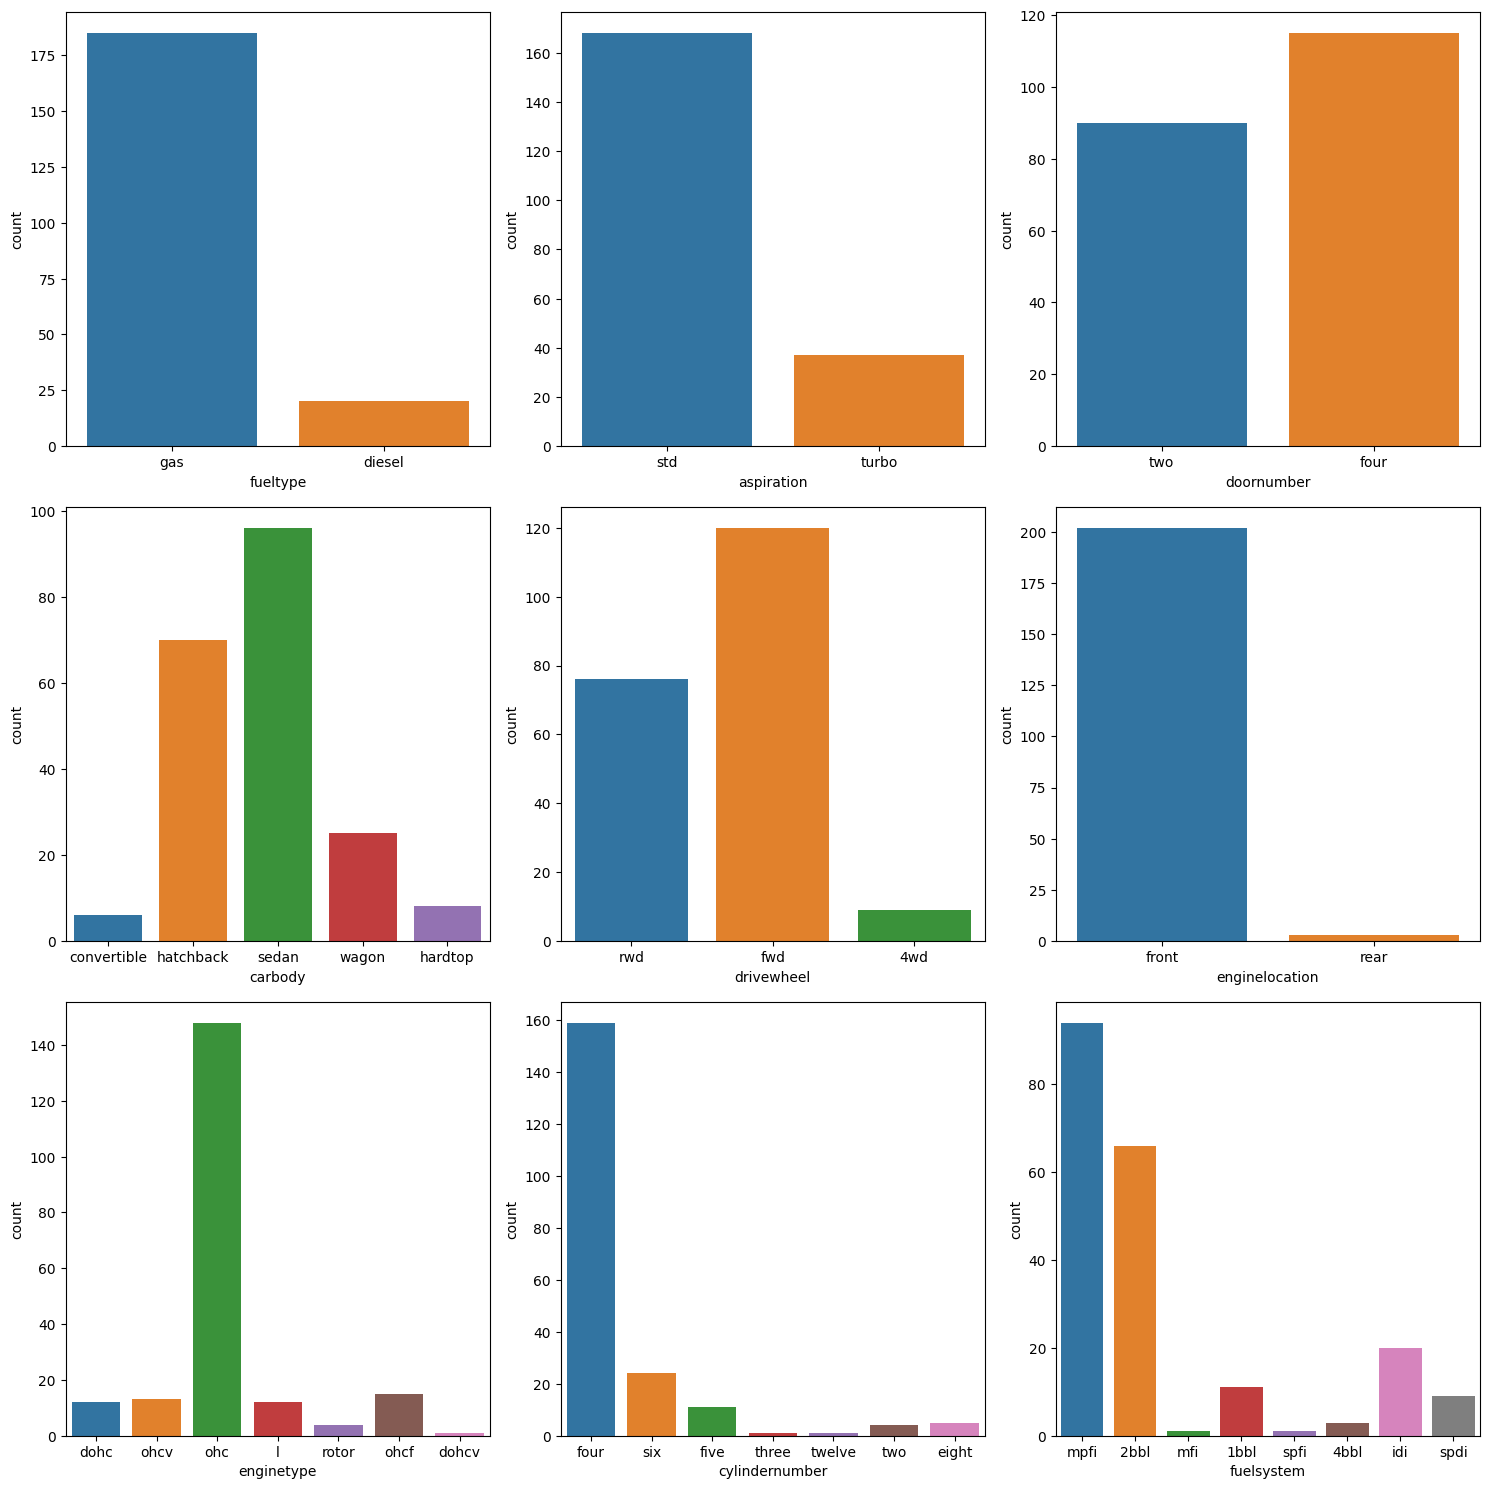

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig = plt.figure(figsize=(15,15))
for idx,col_name in enumerate(columns_object):
    plt.subplot(3,3,idx+1)
    sns.countplot(x=df.loc[:,col_name])
plt.tight_layout()
plt.show()

⭕ Reemplazar los datos de las columnas `cylindernumber` con número

In [ ]:
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

for col in cols:
    df[col].replace(replacing_dict,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Separamos la variable de salida y preparamos las variables predictoras

In [ ]:
y = df['price'].values
print(y.shape)

(205,)


In [ ]:
df.drop(columns='price',inplace=True) #Quitamos la columna price

Hacemos la codificación *one-hot* para las variables categóricas

In [ ]:
X_df = pd.get_dummies(df) #Cambiar variables categoricas a numericas 0 ó 1
X_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


Podríamos realizar una selección de *features*.

In [ ]:
 from sklearn.feature_selection import VarianceThreshold

 selector = VarianceThreshold()
 X = selector.fit_transform(X_df)
 X_df = pd.DataFrame(X,columns=selector.get_feature_names_out())  
 X_df

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,4.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,4.0,109.1,188.8,68.9,55.5,2952.0,4.0,141.0,3.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-1.0,4.0,109.1,188.8,68.8,55.5,3049.0,4.0,141.0,3.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-1.0,4.0,109.1,188.8,68.9,55.5,3012.0,6.0,173.0,3.58,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-1.0,4.0,109.1,188.8,68.9,55.5,3217.0,6.0,145.0,3.01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Hacemos normalización

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)
pd.DataFrame(X,columns=X_df.columns)  # Sólo para visualizar los datos

#---- Sin escalamiento ---
# X = X_df.values

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,0.133509,-1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,...,3.843076,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.938490,0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.938490,0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.884652,1.721873,1.198549,1.398245,0.728239,0.763241,-0.352887,0.339248,1.666445,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
201,-1.476452,0.884652,1.721873,1.198549,1.351515,0.728239,0.949992,-0.352887,0.339248,1.666445,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
202,-1.476452,0.884652,1.721873,1.198549,1.398245,0.728239,0.878757,1.502032,1.109571,0.926204,...,3.843076,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
203,-1.476452,0.884652,1.721873,1.198549,1.398245,0.728239,1.273437,1.502032,0.435538,-1.183483,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014


### Entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=4595) 

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((153, 45), (153,))
Prueba: ((52, 45), (52,))


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Veamos el coeficiente de determinación del desempeño en el conjunto de prueba

In [ ]:
lr.score(X_train,y_train) 

0.9323554646105839

### Predicciones

Predecimos usando las variables predictoras del conjunto de prueba

In [ ]:
y_pred_test = lr.predict(X_test)

Veamos cómo se ven las predicciones

In [ ]:
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
[45400. 35550.  6377.  7957.  7126.]
Valores predichos:
[36379.07 31599.06  5361.83  6507.69  7619.26]


Representemos gráficamente esta comparación

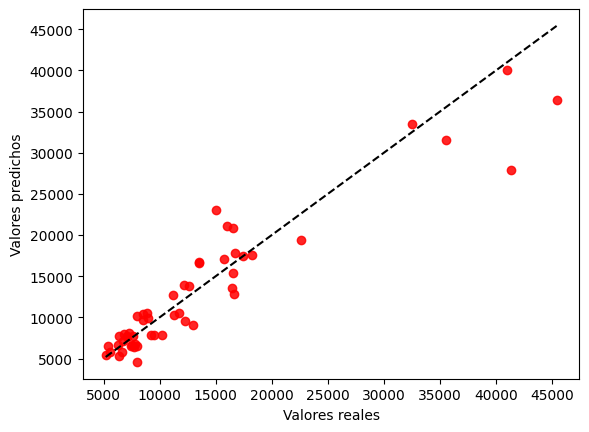

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85)
plt.plot(xaxis,xaxis,'k--')
# plt.plot(y_tr, y_predict_train_lr, 'bx')
# plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

Podemos usar otras métricas de rendimiento.

Más información: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Promedio del error absoluto y cuadrático medio
print(mean_absolute_error(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))

2126.924016108086
10144395.448759733


También podemos comparar usando los valores de entrenamiento

In [ ]:
y_pred_train = lr.predict(X_train)

In [ ]:
print(f"Valores de prueba:\n{y_train[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_train[:5],2)}")

Valores de prueba:
[10345. 16500.  6795. 19045.  6849.]
Valores predichos:
[ 8774.45 14761.76  6375.   21512.7   6488.08]


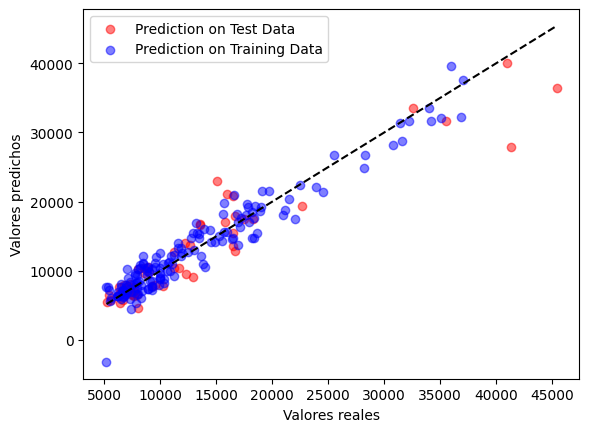

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.5)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.5)
plt.plot(xaxis,xaxis,'k--')
plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

In [ ]:
print(f"Entrenamiento: {lr.score(X_train,y_train)}")
print(f"Prueba: {lr.score(X_test,y_test)}")

Entrenamiento: 0.9323554646105839
Prueba: 0.8854270450183647


### Interpretación de los resultados

Podemos acceder a los coeficientes de la regresión. Vemos que hay un coeficiente por cada feature. 

In [ ]:
print(lr.coef_.shape)
print(lr.coef_)

(45,)
[  916.09819937   274.13485557  1410.24471499 -1160.60885811
  1125.63865026   562.14330414  2448.56889059   131.39637659
  4600.89036698 -1104.6117202  -1715.46572984 -5003.19812076
  1186.89533812   564.89685541   104.70116839   820.88871018
  1654.2063445  -1654.2063445   -198.42538682   198.42538682
   525.40668241  -127.23524035  -118.45552175   239.67604164
  -389.16710479  -178.75661336  -234.49422584   315.0076889
  -734.00681413   734.00681413  -131.08246366    98.16619541
  -871.89273636   706.68531517  -150.915122    -894.91588617
  1224.66162621    35.24836387  -262.2288692   -184.72824301
  1654.2063445   -279.77193696  -354.11344293  -742.91603979
   -85.11699784]


Los organizamos con el nombre de cada *feature*

In [ ]:
pd.DataFrame(lr.coef_.reshape(1,-1),columns=X_df.columns)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,916.098199,274.134856,1410.244715,-1160.608858,1125.63865,562.143304,2448.568891,131.396377,4600.890367,-1104.61172,...,-894.915886,1224.661626,35.248364,-262.228869,-184.728243,1654.206344,-279.771937,-354.113443,-742.91604,-85.116998


Veamos cuales tienen más peso

In [ ]:
columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr.coef_))
coefs_dict

{'symboling': 916.0981993652057,
 'doornumber': 274.1348555721439,
 'wheelbase': 1410.2447149908915,
 'carlength': -1160.6088581084657,
 'carwidth': 1125.6386502567552,
 'carheight': 562.143304138126,
 'curbweight': 2448.5688905923257,
 'cylindernumber': 131.39637658839158,
 'enginesize': 4600.890366980912,
 'boreratio': -1104.6117202012579,
 'stroke': -1715.4657298424522,
 'compressionratio': -5003.198120761166,
 'horsepower': 1186.8953381178028,
 'peakrpm': 564.8968554060189,
 'citympg': 104.70116839033902,
 'highwaympg': 820.8887101777866,
 'fueltype_diesel': 1654.2063444983203,
 'fueltype_gas': -1654.2063444983346,
 'aspiration_std': -198.4253868248611,
 'aspiration_turbo': 198.42538682486122,
 'carbody_convertible': 525.4066824102972,
 'carbody_hardtop': -127.23524035368143,
 'carbody_hatchback': -118.45552175291066,
 'carbody_sedan': 239.6760416442198,
 'carbody_wagon': -389.1671047943468,
 'drivewheel_4wd': -178.75661336311973,
 'drivewheel_fwd': -234.49422583981692,
 'drivewhee

In [ ]:
dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True))

{'enginesize': 4600.890366980912,
 'curbweight': 2448.5688905923257,
 'fueltype_diesel': 1654.2063444983203,
 'fuelsystem_idi': 1654.2063444983191,
 'wheelbase': 1410.2447149908915,
 'enginetype_rotor': 1224.661626210377,
 'horsepower': 1186.8953381178028,
 'carwidth': 1125.6386502567552,
 'symboling': 916.0981993652057,
 'highwaympg': 820.8887101777866,
 'enginelocation_rear': 734.006814130067,
 'enginetype_ohc': 706.6853151688758,
 'peakrpm': 564.8968554060189,
 'carheight': 562.143304138126,
 'carbody_convertible': 525.4066824102972,
 'drivewheel_rwd': 315.0076889042546,
 'doornumber': 274.1348555721439,
 'carbody_sedan': 239.6760416442198,
 'aspiration_turbo': 198.42538682486122,
 'cylindernumber': 131.39637658839158,
 'citympg': 104.70116839033902,
 'enginetype_dohcv': 98.16619540822256,
 'fuelsystem_1bbl': 35.24836387397582,
 'fuelsystem_spfi': -85.11699783851432,
 'carbody_hatchback': -118.45552175291066,
 'carbody_hardtop': -127.23524035368143,
 'enginetype_dohc': -131.08246365

Una pregunta que surge con frecuencia se refiere a la incertidumbre acerca de los parámetros del modelo, ya que estos también son variables aleatorias.

En general, Scikit-Learn no proporciona herramientas para obtener conclusiones acerca de los parámetros internos del modelo: la interpretación de los parámetros del modelo es mucho más una *pregunta de modelaje estadístico* que una pregunta de *aprendizaje automático*. El aprendizaje automático se centra más la *predicción*.

No obstante, si se desea profundizar en el significado de los parámetros del modelo, hay herramientas como las incluidas en el [paquete de Statsmodels de Python](http://statsmodels.sourceforge.net/).

In [ ]:
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train)
X_train_1_df = pd.DataFrame(X_train_1, columns=['const']+X_df.columns.to_list()) 
display(X_train_1_df.head())
results = sm.OLS(y_train, X_train_1_df).fit()
print(results.summary())

,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.133509,-1.130388,-0.375655,-0.402145,0.043083,-1.117874,-0.505509,-0.352887,-0.407003,...,-0.260208,-0.141069,-0.23812,1.451227,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014
1,1.0,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,1.0,0.133509,-1.130388,-0.941655,-1.214681,-0.798053,0.153893,-1.252512,-0.352887,-0.864383,...,-0.260208,-0.141069,-0.23812,1.451227,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014
3,1.0,-1.476452,0.884652,1.721873,1.198549,1.351515,0.728239,0.949992,-0.352887,0.339248,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,1.0,0.133509,0.884652,-0.708596,-0.710909,-0.984972,0.317992,-1.188979,-0.352887,-0.719947,...,-0.260208,-0.141069,-0.23812,1.451227,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     42.84
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           8.83e-52
Time:                        17:44:45   Log-Likelihood:                -1374.5
No. Observations:                 153   AIC:                             2825.
Df Residuals:                     115   BIC:                             2940.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.319e+04 

**Algunas observaciones**

* `R-squared` nos dice que nuestro modelo explica 93.2% del cambio en la variable dependiente (el precio del automovil).
* `Adj. R-squared` ajusta el coeficiente `R-squared` tomando en cuenta el número de variables (features).
* Los p-values `P>|t|` nos dice qué tan probable es que el coeficiente de la población haya sido medido por azar. Es decir, pone a prueba la hipótesis nula de que la variable independiente no tiene correlación con la variable dependiente. Hay dos escenarios:
    * El valor es superior al nivel de significancia, no hay asociación entre los cambios en la variable independiente y los cambios en la variable dependiente. En otras palabras, no hay pruebas suficientes para concluir que existe un efecto a nivel de población.
    * Si el valor p de una variable es inferior al nivel de significancia, los datos de la muestra proporcionan pruebas suficientes para rechazar la hipótesis nula de toda la población. Sus datos favorecen la hipótesis de que existe una correlación distinta de cero. Los cambios en la variable independiente están asociados a cambios en la variable dependiente a nivel poblacional. Esta variable es estadísticamente significativa y probablemente merezca la pena añadirla a su modelo de regresión.

## Ejemplo 3: Regularización

La regularización es una técnica de regresión lineal que penaliza la magnitud de los coeficientes de la regresión. Los coeficientes minimizan una suma de cuadrados residual penalizada:

$$\text{min}_w \|Xw - y \|^2+α\|w\|^2$$

El parámetro de complejidad $\alpha>0$ controla la cantidad de contracción: cuanto mayor sea el valor de $\alpha$, mayor será la cantidad de contracción y, por tanto, los coeficientes serán más resistentes a la colinealidad.

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/cars-prices.csv'
df = pd.read_csv(url)
df.drop(columns=['car_ID','CarName'],inplace=True)
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

for col in cols:
    df[col].replace(replacing_dict,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
y = df['price'].values

df.drop(columns='price',inplace=True)
X_df = pd.get_dummies(df)
X_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)
pd.DataFrame(X,columns=X_df.columns)  # Sólo para visualizar los datos

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,0.133509,-1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,...,3.843076,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.938490,0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.938490,0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.884652,1.721873,1.198549,1.398245,0.728239,0.763241,-0.352887,0.339248,1.666445,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
201,-1.476452,0.884652,1.721873,1.198549,1.351515,0.728239,0.949992,-0.352887,0.339248,1.666445,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
202,-1.476452,0.884652,1.721873,1.198549,1.398245,0.728239,0.878757,1.502032,1.109571,0.926204,...,3.843076,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
203,-1.476452,0.884652,1.721873,1.198549,1.398245,0.728239,1.273437,1.502032,0.435538,-1.183483,...,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=4595) 

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((153, 45), (153,))
Prueba: ((52, 45), (52,))


In [ ]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=2)
lr.fit(X_train,y_train)

print(f"Entrenamiento: {lr.score(X_train,y_train)}")
print(f"Prueba: {lr.score(X_test,y_test)}")

Entrenamiento: 0.9290668412404213
Prueba: 0.8742214158192938


In [ ]:
columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr.coef_))
dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True))

{'enginesize': 2922.8246991162137,
 'curbweight': 2353.6967274196336,
 'horsepower': 1391.648653772969,
 'wheelbase': 1229.6779284479483,
 'carwidth': 1210.4068991424288,
 'enginetype_rotor': 1054.9169372147182,
 'cylindernumber': 901.967446121611,
 'symboling': 777.3880071274691,
 'enginelocation_rear': 721.5748776892892,
 'fuelsystem_idi': 629.8229939678259,
 'fueltype_diesel': 629.8229939678163,
 'enginetype_ohc': 617.2771908588211,
 'carbody_convertible': 610.1517457294533,
 'carheight': 588.6196994764576,
 'highwaympg': 524.6816885045222,
 'peakrpm': 395.7331935143316,
 'drivewheel_rwd': 385.4397354306452,
 'doornumber': 267.269538425679,
 'carbody_sedan': 221.98201593909744,
 'aspiration_turbo': 220.4340598886004,
 'fuelsystem_1bbl': 125.49068134166218,
 'citympg': 8.25945568991394,
 'fuelsystem_2bbl': 3.217685252355505,
 'enginetype_dohcv': -74.07787385018555,
 'carbody_hatchback': -81.33575427160147,
 'fuelsystem_spfi': -84.01937774542372,
 'enginetype_ohcf': -86.98029957655635

¿Qué efecto tiene el parámetro $\alpha$ sobre la magnitud de los coeficientes?

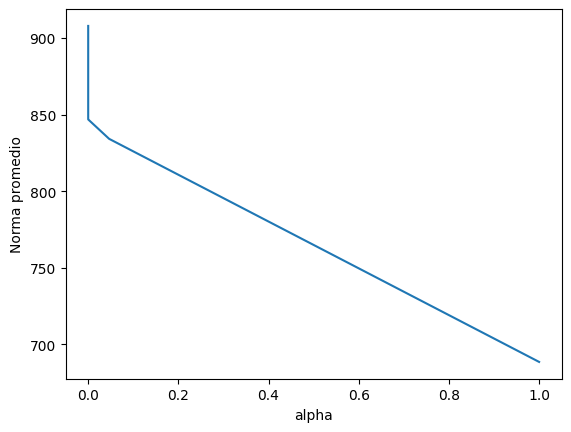

In [ ]:
import matplotlib.pyplot as plt

alphas = np.logspace(-12,0,num=10)
normas = []

for alpha in alphas:
    lr = Ridge(alpha=alpha)
    lr.fit(X_train,y_train)
    normas.append(np.mean(np.abs(lr.coef_)))

plt.figure()
plt.plot(alphas,normas)
plt.xlabel("alpha")
plt.ylabel("Norma promedio")
plt.show()

¿Qué efecto tiene el parámetro $\alpha$ en el score?

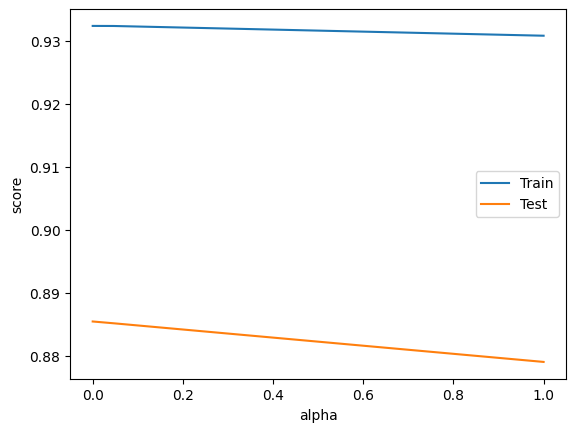

In [ ]:
import matplotlib.pyplot as plt

alphas = np.logspace(-12,0,num=10)
train_scores = []
test_scores = []

for alpha in alphas:
    lr = Ridge(alpha=alpha)
    lr.fit(X_train,y_train)
    train_scores.append(lr.score(X_train,y_train))
    test_scores.append(lr.score(X_test,y_test))

plt.figure()
plt.plot(alphas,train_scores,label="Train")
plt.plot(alphas,test_scores,label="Test")
plt.xlabel("alpha")
plt.ylabel("score")
plt.legend()
plt.show()

Como podemos ver, en este ejemplo concreto, la regularización no beneficia al problema en cuestión de la métrica de rendimiento.

#⭕ Ejercicio

Usaremos un dataset sobre publicidad. Este dataset consta de 200 registros, cada registro consta de las variables.

* TV: dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
* Radio: inversión publicitaria en radio
* Newspaper: inversión publicitaria en periódicos
* Sales: ventas de un solo producto en un mercado determinado (en miles de unidades).


In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/advertising.csv'
df = pd.read_csv(url,index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


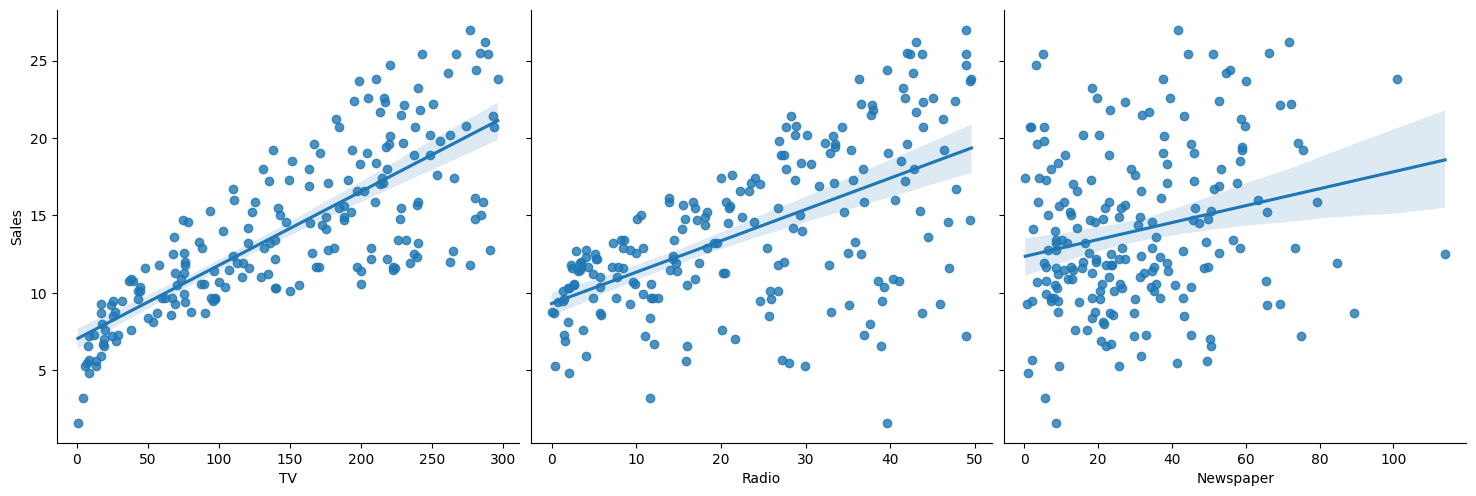

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

Entrenar un modelo de regresión lineal usando el 85% de las instancias, separar el resto para prueba. Reportar la métrica de rendimiento en las predicciones con el conjunto de prueba.

Considera las siguientes situaciones en el preprocesamiento:

* ¿Hay valores faltantes?
* ¿Cuál es el rango de las 3 variables?
* ¿Hay alguna variable que consideres que no es muy relevante?
* Realiza la técnica de normalización que consideres necesario.

¿Cuál es el menor MAE que puedes obtener en el conjunto de prueba? Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.





In [ ]:
# ¿Hay valores faltantes?
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
y=df["Sales"].values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [ ]:
df.drop(columns='Sales', inplace=True)
df

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [ ]:
#¿Cuál es el rango de las 3 variables?
display(df.max(), df.min())


TV           296.4
Radio         49.6
Newspaper    114.0
dtype: float64

TV           0.7
Radio        0.0
Newspaper    0.3
dtype: float64

In [ ]:
X_df=df

In [ ]:
#Normalizar datos, Realiza la técnica de normalización que consideres necesario.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)
pd.DataFrame(X,columns=X_df.columns) 

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994
...,...,...,...
195,0.126818,0.074597,0.118734
196,0.316199,0.098790,0.068602
197,0.596212,0.187500,0.053650
198,0.956713,0.846774,0.579595


In [ ]:
#Variables de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=4595) 

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((170, 3), (170,))
Prueba: ((30, 3), (30,))


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.9056067383379365

In [ ]:
print(f"Entrenamiento: {lr.score(X_train,y_train)}")
print(f"Prueba: {lr.score(X_test,y_test)}")

Entrenamiento: 0.9056067383379365
Prueba: 0.8395716021330153


In [ ]:
y_pred_test = lr.predict(X_test)

Veamos cómo se ven las predicciones

In [ ]:
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
[12.6 11.7 14.6 23.8 20.8]
Valores predichos:
[13.22 12.07 14.26 23.08 20.7 ]


Representemos gráficamente esta comparación

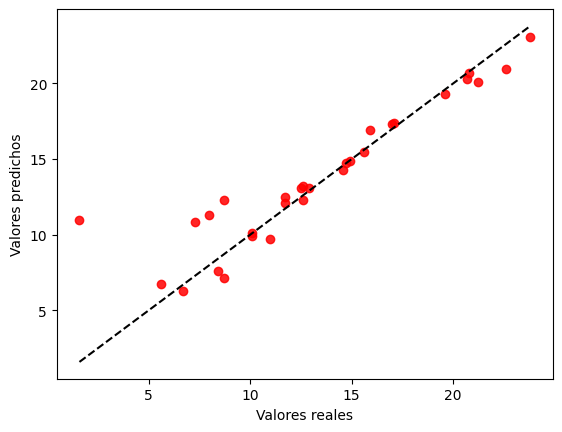

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85)
plt.plot(xaxis,xaxis,'k--')
# plt.plot(y_tr, y_predict_train_lr, 'bx')
# plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

Podemos usar otras métricas de rendimiento.

Más información: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Promedio del error absoluto y cuadrático medio
print(mean_absolute_error(y_test,y_pred_test))
#print(mean_squared_error(y_test,y_pred_test))

1.1485384133448908


In [ ]:
#¿Cuál es el menor MAE que puedes obtener en el conjunto de prueba? 
#Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.
#MAE (Mean Absolute Error): El error absoluto medio es una medida que se obtiene siguiendo estos pasos: Se resta la diferencia entre el valor pronosticado y el valor real en cada punto que se pronostica.


Con StandardScaler() se obtiene un score de 0.9118975009777542
y un MAE de 1.37908005529675

In [ ]:
#¿Hay alguna variable que consideres que no es muy relevante?
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train)
X_train_1_df = pd.DataFrame(X_train_1, columns=['const']+X_df.columns.to_list()) 
display(X_train_1_df.head())
results = sm.OLS(y_train, X_train_1_df).fit()
print(results.summary())

,const,TV,Radio,Newspaper
0,1.0,0.946906,0.280242,0.322779
1,1.0,0.440987,0.862903,0.251539
2,1.0,0.697328,0.169355,0.229551
3,1.0,0.800473,0.102823,0.204046
4,1.0,0.024011,0.784274,0.442392


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     530.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           8.18e-85
Time:                        17:44:53   Log-Likelihood:                -319.79
No. Observations:                 170   AIC:                             647.6
Df Residuals:                     166   BIC:                             660.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1838      0.320      9.941      0.0

Algunas observaciones

* R-squared nos dice que nuestro modelo explica **90.56%** del cambio en la 
variable dependiente.
* Adj. R-squared ajusta el coeficiente R-squared tomando en cuenta el número de variables. **90.4%**
* Los p-values P>|t| nos dice qué tan probable es que el coeficiente de la población haya sido medido por azar. **Newspaper** El valor es superior al nivel de significancia (no hay pruebas suficientes para concluir que existe un efecto a nivel de población).

De las gráficas de dispersión se observa que los datos de **Newspaper** no tienen correlación con las ventas.


## Análisis sin la columna **Newspaper**

In [ ]:
url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/advertising.csv'
df = pd.read_csv(url,index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
df.drop(columns=['Sales','Newspaper'], inplace=True)
df

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
...,...,...
196,38.2,3.7
197,94.2,4.9
198,177.0,9.3
199,283.6,42.0


In [ ]:
#¿Cuál es el rango de las 3 variables?
display(df.max(), df.min())


TV       296.4
Radio     49.6
dtype: float64

TV       0.7
Radio    0.0
dtype: float64

In [ ]:
X_df=df

In [ ]:
#Normalizar datos, Realiza la técnica de normalización que consideres necesario.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)
pd.DataFrame(X,columns=X_df.columns) 

,TV,Radio
0,0.775786,0.762097
1,0.148123,0.792339
2,0.055800,0.925403
3,0.509976,0.832661
4,0.609063,0.217742
...,...,...
195,0.126818,0.074597
196,0.316199,0.098790
197,0.596212,0.187500
198,0.956713,0.846774


In [ ]:
#Variables de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=4595) 

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((170, 2), (170,))
Prueba: ((30, 2), (30,))


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.9055707120540262

In [ ]:
print(f"Entrenamiento: {lr.score(X_train,y_train)}")
print(f"Prueba: {lr.score(X_test,y_test)}")

Entrenamiento: 0.9055707120540262
Prueba: 0.8395429877779055


In [ ]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([13.25446686, 12.0910281 , 14.23910273, 23.18115346, 20.7416448 ,
       14.90106002, 19.28552834, 10.85504283, 10.1263532 , 17.26506597,
       13.14109017,  9.70253451,  6.31040429,  9.92807565, 12.32026883,
       10.90235109,  6.81324972, 13.24834495, 11.26293979,  7.58064812,
       20.14358865, 16.88690297, 12.44757804, 14.70317692, 20.24621299,
       17.39529778, 20.90748468, 15.46160051, 12.41232106,  7.13627473])

Veamos cómo se ven las predicciones

In [ ]:
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
[12.6 11.7 14.6 23.8 20.8]
Valores predichos:
[13.25 12.09 14.24 23.18 20.74]


Representemos gráficamente esta comparación

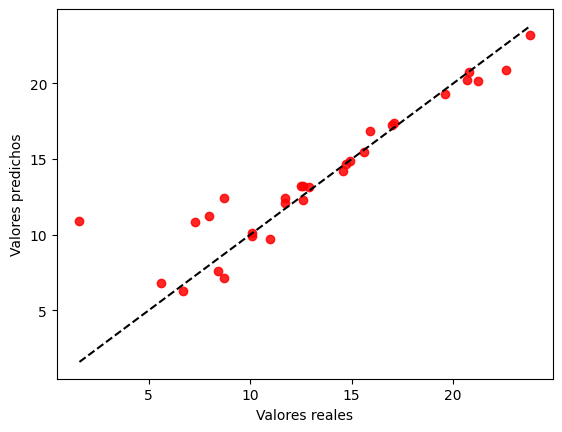

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85)
plt.plot(xaxis,xaxis,'k--')
# plt.plot(y_tr, y_predict_train_lr, 'bx')
# plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

Podemos usar otras métricas de rendimiento.

Más información: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Promedio del error absoluto y cuadrático medio
print(mean_absolute_error(y_test,y_pred_test))
#print(mean_squared_error(y_test,y_pred_test))

1.1540582382768954


In [ ]:
#¿Cuál es el menor MAE que puedes obtener en el conjunto de prueba? 
#Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.
#MAE (Mean Absolute Error): El error absoluto medio es una medida que se obtiene siguiendo estos pasos: Se resta la diferencia entre el valor pronosticado y el valor real en cada punto que se pronostica.


Con StandardScaler() se obtiene un score de 0.9118975009777542
y un MAE de 1.37908005529675

In [ ]:
#¿Hay alguna variable que consideres que no es muy relevante?
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train)
X_train_1_df = pd.DataFrame(X_train_1, columns=['const']+X_df.columns.to_list()) 
display(X_train_1_df.head())
results = sm.OLS(y_train, X_train_1_df).fit()
print(results.summary())

,const,TV,Radio
0,1.0,0.946906,0.280242
1,1.0,0.440987,0.862903
2,1.0,0.697328,0.169355
3,1.0,0.800473,0.102823
4,1.0,0.024011,0.784274


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     800.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.64e-86
Time:                        17:44:54   Log-Likelihood:                -319.83
No. Observations:                 170   AIC:                             645.7
Df Residuals:                     167   BIC:                             655.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1571      0.301     10.479      0.0